In [3]:
import pandas as pd

# Load dataset (Excel file)
df = pd.read_excel("telemonitoring_parkinsons_updrs.data.xlsx")

# Compute min and max for each column
ranges = pd.DataFrame({
    "Feature name": df.columns,
    "Type": ["Integer" if str(df[col].dtype).startswith("int") else 
             "Float" if str(df[col].dtype).startswith("float") else "Categorical"
             for col in df.columns],
    "Value range": [f"{df[col].min()} – {df[col].max()}" for col in df.columns]
})

# Display the table
print(ranges)

# Optionally, save it to Excel/CSV
ranges.to_excel("feature_value_ranges.xlsx", index=False)
ranges.to_csv("feature_value_ranges.csv", index=False)


     Feature name     Type            Value range
0             age  Integer                36 – 85
1             sex  Integer                  0 – 1
2       test_time    Float       -4.2625 – 215.49
3       Jitter(%)    Float      0.00083 – 0.09999
4     Jitter(Abs)    Float  2.25e-06 – 0.00044559
5      Jitter:RAP    Float      0.00033 – 0.05754
6     Jitter:PPQ5    Float      0.00043 – 0.06956
7      Jitter:DDP    Float      0.00098 – 0.17263
8         Shimmer    Float      0.00306 – 0.26863
9     Shimmer(dB)    Float          0.026 – 2.107
10   Shimmer:APQ3    Float      0.00161 – 0.16267
11   Shimmer:APQ5    Float      0.00194 – 0.16702
12  Shimmer:APQ11    Float      0.00249 – 0.27546
13    Shimmer:DDA    Float      0.00484 – 0.48802
14            NHR    Float     0.000286 – 0.74826
15            HNR    Float         1.659 – 37.875
16           RPDE    Float      0.15102 – 0.96608
17            DFA    Float       0.51404 – 0.8656
18            PPE    Float     0.021983 – 0.73173


In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("telemonitoring_parkinsons_updrs.data.xlsx")

# Show basic info to check non-null counts
print(df.info())

# Count missing values per column
missing_per_column = df.isnull().sum()
print("\nMissing values per column:\n", missing_per_column)

# Count total missing values
total_missing = df.isnull().sum().sum()
print("\nTotal missing values in dataset:", total_missing)

# Display rows with missing values (optional)
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:\n", missing_rows)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   Jitter(%)      5875 non-null   float64
 4   Jitter(Abs)    5875 non-null   float64
 5   Jitter:RAP     5875 non-null   float64
 6   Jitter:PPQ5    5875 non-null   float64
 7   Jitter:DDP     5875 non-null   float64
 8   Shimmer        5875 non-null   float64
 9   Shimmer(dB)    5875 non-null   float64
 10  Shimmer:APQ3   5875 non-null   float64
 11  Shimmer:APQ5   5875 non-null   float64
 12  Shimmer:APQ11  5875 non-null   float64
 13  Shimmer:DDA    5875 non-null   float64
 14  NHR            5875 non-null   float64
 15  HNR            5875 non-null   float64
 16  RPDE           5875 non-null   float64
 17  DFA            5875 non-null   float64
 18  PPE     

In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel("telemonitoring_parkinsons_updrs.data.xlsx")

# Dictionary to store outliers for each feature
outliers_dict = {}

# Loop through each numeric column
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Store results
    outliers_dict[col] = outliers

# Example: Print number of outliers per feature
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")


age: 101 outliers
sex: 0 outliers
test_time: 0 outliers
Jitter(%): 398 outliers
Jitter(Abs): 366 outliers
Jitter:RAP: 414 outliers
Jitter:PPQ5: 425 outliers
Jitter:DDP: 413 outliers
Shimmer: 333 outliers
Shimmer(dB): 332 outliers
Shimmer:APQ3: 332 outliers
Shimmer:APQ5: 314 outliers
Shimmer:APQ11: 314 outliers
Shimmer:DDA: 331 outliers
NHR: 436 outliers
HNR: 171 outliers
RPDE: 26 outliers
DFA: 0 outliers
PPE: 206 outliers
total_UPDRS: 0 outliers
motor_UPDRS: 0 outliers


✅ Features and both target variables (total_UPDRS & motor_UPDRS) have been separated.
✅ Cleaned data saved as cleaned_data.xlsx

📊 Correlation Matrix (Features only):
                    Age       Sex  test_time  Jitter(%)  Jitter(Abs)  \
Age            1.000000  0.050450   0.019131   0.144313     0.064487   
Sex            0.050450  1.000000   0.012154  -0.133181    -0.414415   
test_time      0.019131  0.012154   1.000000  -0.001033    -0.004069   
Jitter(%)      0.144313 -0.133181  -0.001033   1.000000     0.862067   
Jitter(Abs)    0.064487 -0.414415  -0.004069   0.862067     1.000000   
Jitter:RAP     0.108817 -0.004541  -0.024641   0.931535     0.740895   
Jitter:PPQ5    0.134295 -0.141813  -0.000137   0.943293     0.833338   
Jitter:DDP     0.108837 -0.004562  -0.024610   0.931562     0.740908   
Shimmer        0.245296 -0.160490  -0.017826   0.506629     0.465227   
Shimmer(dB)    0.259327 -0.168546  -0.008573   0.530419     0.473687   
Shimmer:APQ3   0.211008 -0.124766  -0.012

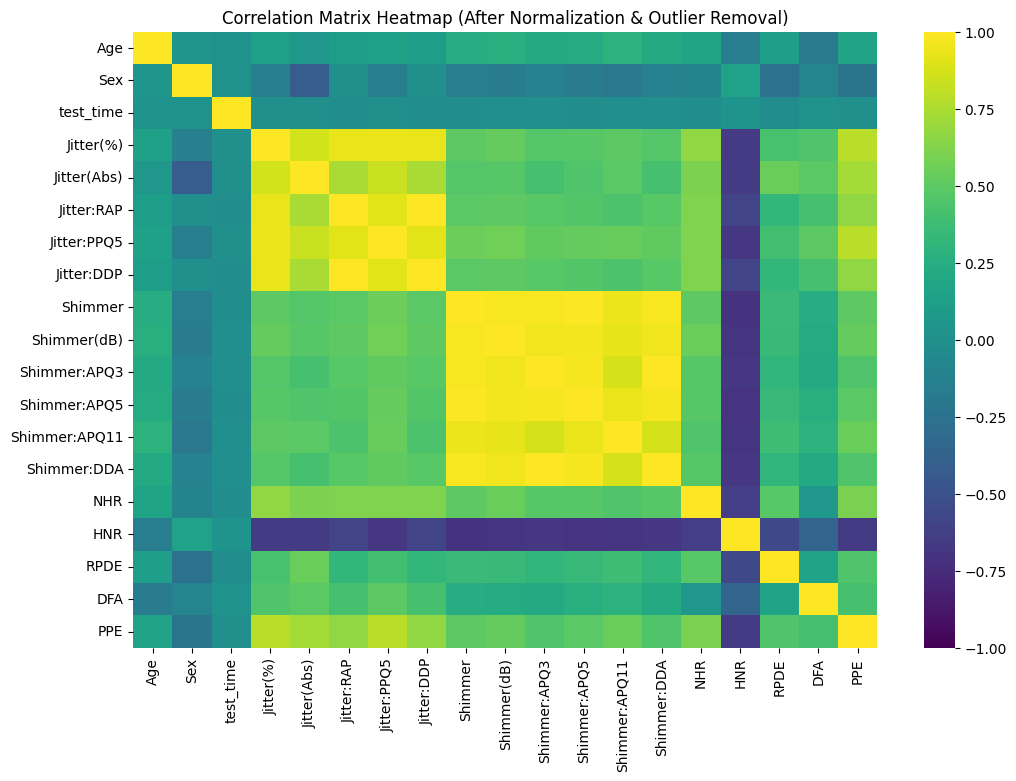


📈 Variance Inflation Factor (VIF) for each feature (after cleaning & normalization):
          Feature           VIF
0             Age  1.249889e+00
1             Sex  1.767121e+00
2       test_time  1.018158e+00
3       Jitter(%)  2.447096e+01
4     Jitter(Abs)  8.268850e+00
5      Jitter:RAP  1.363267e+05
6     Jitter:PPQ5  1.365374e+01
7      Jitter:DDP  1.363970e+05
8         Shimmer  1.807047e+02
9     Shimmer(dB)  3.545208e+01
10   Shimmer:APQ3  6.583860e+06
11   Shimmer:APQ5  5.311421e+01
12  Shimmer:APQ11  2.251046e+01
13    Shimmer:DDA  6.583916e+06
14            NHR  2.955262e+00
15            HNR  4.070649e+00
16           RPDE  1.955961e+00
17            DFA  1.900887e+00
18            PPE  3.619245e+00

⚠️ Features with VIF > 5 (indicating multicollinearity):
          Feature           VIF
3       Jitter(%)  2.447096e+01
4     Jitter(Abs)  8.268850e+00
5      Jitter:RAP  1.363267e+05
6     Jitter:PPQ5  1.365374e+01
7      Jitter:DDP  1.363970e+05
8         Shimmer  1.807

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --------------------------
# Step 1: Load dataset
# --------------------------
df = pd.read_excel("telemonitoring_parkinsons_updrs.data.xlsx")

# Define feature names (first 19 columns only)
feature_names = ['Age', 'Sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)',
    'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
    'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA',
    'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

# Separate features (first 19 columns) and targets (last 2 columns)
X_features = df.iloc[:, 0:19]       # Features
y_total = df.iloc[:, 19]            # total_UPDRS (20th column)
y_motor = df.iloc[:, 20]            # motor_UPDRS (21st column)

print("✅ Features and both target variables (total_UPDRS & motor_UPDRS) have been separated.")

# --------------------------
# Step 2: Remove outliers by IQR
# --------------------------
def remove_outliers_iqr(data):
    cleaned = data.copy()
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
    return cleaned

X_cleaned = remove_outliers_iqr(X_features)

# Keep targets aligned with cleaned features
df_cleaned = pd.concat([X_cleaned,
                        y_total.loc[X_cleaned.index],
                        y_motor.loc[X_cleaned.index]], axis=1)

# Save cleaned dataset
df_cleaned.to_excel("cleaned_data.xlsx", index=False)
print("✅ Cleaned data saved as cleaned_data.xlsx")

# --------------------------
# Step 3: Min-Max Normalization (features only)
# --------------------------
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_cleaned),
                            columns=feature_names,
                            index=X_cleaned.index)

# --------------------------
# Step 4: Pearson Correlation Matrix (PCC)
# --------------------------
corr_matrix = X_normalized.corr(method='pearson')
print("\n📊 Correlation Matrix (Features only):")
print(corr_matrix)

# Optional heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, xticklabels=feature_names,
            yticklabels=feature_names,
            cmap="viridis", vmin=-1, vmax=1, annot=False)
plt.title("Correlation Matrix Heatmap (After Normalization & Outlier Removal)")
plt.show()

# --------------------------
# Step 5: Variance Inflation Factor (VIF)
# --------------------------
X_with_const = add_constant(X_normalized)
vif_values = [variance_inflation_factor(X_with_const.values, i)
              for i in range(1, X_with_const.shape[1])]  # skip constant

vif_df = pd.DataFrame({
    "Feature": feature_names,
    "VIF": vif_values
})

print("\n📈 Variance Inflation Factor (VIF) for each feature (after cleaning & normalization):")
print(vif_df)

print("\n⚠️ Features with VIF > 5 (indicating multicollinearity):")
print(vif_df[vif_df["VIF"] > 5])


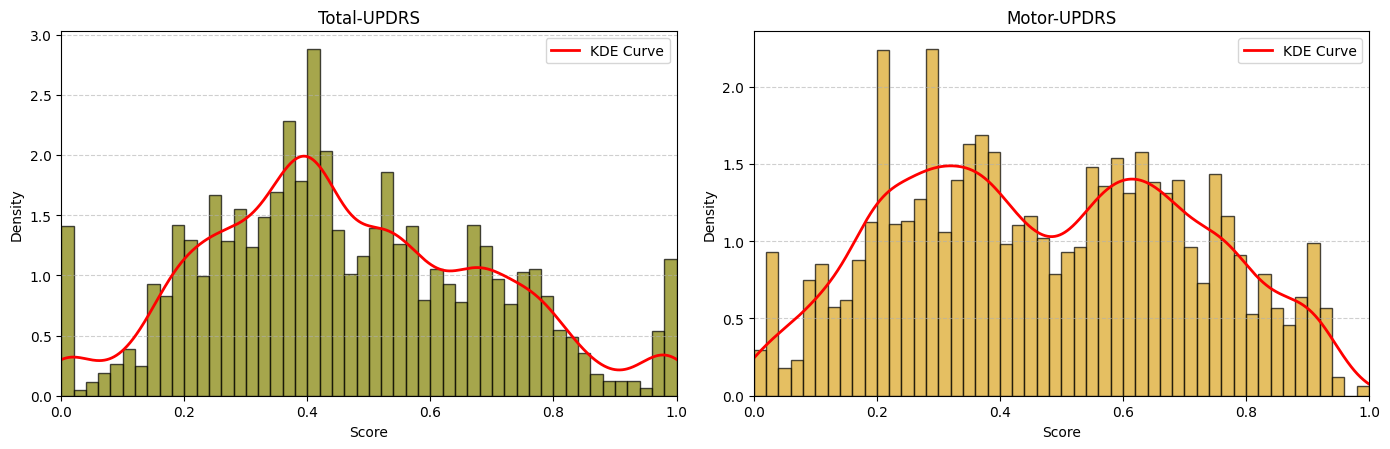

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# === Load Data ===
df = pd.read_excel('UCI parkinson two targets.xlsx')
total_UPDRS = df['total_UPDRS']
motor_UPDRS = df['motor_UPDRS']

# === Prepare KDEs ===
x_total = np.linspace(0, 1, 1000)
kde_total = gaussian_kde(total_UPDRS)
y_total = kde_total(x_total)

x_motor = np.linspace(0, 1, 1000)
kde_motor = gaussian_kde(motor_UPDRS)
y_motor = kde_motor(x_motor)

# === Plot Histograms with KDEs ===
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('', fontsize=16, fontweight='bold')

# Histogram for total_UPDRS
axs[0].hist(total_UPDRS, bins=50, color='olive', edgecolor='black', alpha=0.7, density=True)
axs[0].plot(x_total, y_total, color='red', linewidth=2, label='KDE Curve')
axs[0].set_title('Total-UPDRS', fontsize=12)
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Density')
axs[0].set_xlim(0, 1)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[0].legend()

# Histogram for motor_UPDRS
axs[1].hist(motor_UPDRS, bins=50, color='goldenrod', edgecolor='black', alpha=0.7, density=True)
axs[1].plot(x_motor, y_motor, color='red', linewidth=2, label='KDE Curve')
axs[1].set_title('Motor-UPDRS', fontsize=12)
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Density')
axs[1].set_xlim(0, 1)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
